# Bible Word Analyser

## How to use

Enter a strongs number to the text box, and run all cells

In [53]:
strongs_number = input("Enter a Strong's number: ").upper()
print ("You have selected: " + strongs_number)

Enter a Strong's number: H5315
You have selected: H5315


# Reading Data

## Raw Dataset Info
 * https://github.com/openscriptures/morphhb/tree/master - hebrew bible with strongs numbers - lemma is the strongs number. XML format, but can be converted to json

 * https://github.com/openscriptures/HebrewLexicon/tree/master - use this to see what hebrew word is represented by strongs number - XML concordance

* https://github.com/openscriptures/GreekResources/tree/master - json with lexicon containing strongs for the Septuagint. Useful, but maybe not needed at this point

* https://github.com/openscriptures/strongs/blob/master/greek/strongs-greek-dictionary.js - strongs dictionary for hebrew, and importantly, greek

* OpenGNT_BASE_TEXT.zip from https://github.com/eliranwong/OpenGNT/tree/master - stores the greek nt and strongs numbers corresponding to each word

## Generate dictionary of Hebrew words and strongs numbers

In [54]:
"""Download the files"""
from urllib.request import urlretrieve
import os

os.popen("mkdir hebrew")

# The names of each hebrew book to download
book_names = [
    "Gen",
    "Exod",
    "Lev",
    "Num",
    "Deut",
    "Josh",
    "Judg",
    "Ruth",
    "1Sam",
    "2Sam",
    "1Kgs",
    "2Kgs",
    "1Chr",
    "2Chr",
    "Amos",
    "Dan",
    "Eccl",
    "Esth",
    "Ezek",
    "Ezra",
    "Hab",
    "Hag",
    "Hos",
    "Isa",
    "Jer",
    "Job",
    "Joel",
    "Jonah",
    "Lam",
    "Mal",
    "Mic",
    "Nah",
    "Neh",
    "Obad",
    "Prov",
    "Ps",
    "Song",
    "Zech",
    "Zeph"
]

# Download each book
url = "https://raw.githubusercontent.com/openscriptures/morphhb/master/wlc/"
filename = "hebrew/"

for number, book in enumerate(book_names):
  print ("Downloading book " + str(number+1) + " of 39: " + book + ".xml")
  urlretrieve(url + book + ".xml", filename + book + ".xml")

print ("\n\u001b[32mDownloaded all hebrew books!\u001b[0m")



Downloaded all hebrew books!


In [55]:
def extract_numbers(lemma):
    """ Convert strongs numbers to only numbers """
    # Use regular expression to extract numbers
    numbers = re.findall(r'\d+', lemma)
    # Join the extracted numbers into a single string
    result = ''.join(numbers)
    return result

def get_verse(verse_id) :
  """ Get the verse from the verse id in format Obad.1.18 """
  return verse_id.split(".")[2]

def get_book(verse_id) :
  """ Get the book from the verse id in format Obad.1.18 """
  return verse_id.split(".")[0]

def get_chapter(verse_id) :
  """ Get the chapter from the verse id in format Obad.1.18 """
  return verse_id.split(".")[1]

In [56]:
# Read all the book data into a dataframe containing: word, strongs, book, chapter, verse
import xml.etree.ElementTree as ET
import pandas as pd
import re

data = {
    "word": [],
    "lemma": [],
    "book": [],
    "chapter": [],
    "verse": [],
}

# Parse the XML file
for book in book_names:
  tree = ET.parse('hebrew/' + book + '.xml')
  root = tree.getroot()

  # Define the namespace
  namespace = {'osis': 'http://www.bibletechnologies.net/2003/OSIS/namespace'}

  # Find all word elements within each verse
  for verse in root.findall('.//{http://www.bibletechnologies.net/2003/OSIS/namespace}verse'):
      verse_id = verse.attrib.get('osisID')
      for word in verse.findall('.//{http://www.bibletechnologies.net/2003/OSIS/namespace}w'):
          value = word.text
          lemma = word.attrib.get('lemma')
          data["word"].append(value)
          data["lemma"].append("H" + extract_numbers(lemma))
          data["book"].append(get_book(verse_id))
          data["chapter"].append(get_chapter(verse_id))
          data["verse"].append(get_verse(verse_id))

hebrew_words = pd.DataFrame(data)

print ("\n\u001b[32mValues in each book extracted!\u001b[0m")


Values in each book extracted!


# Plotting the Data

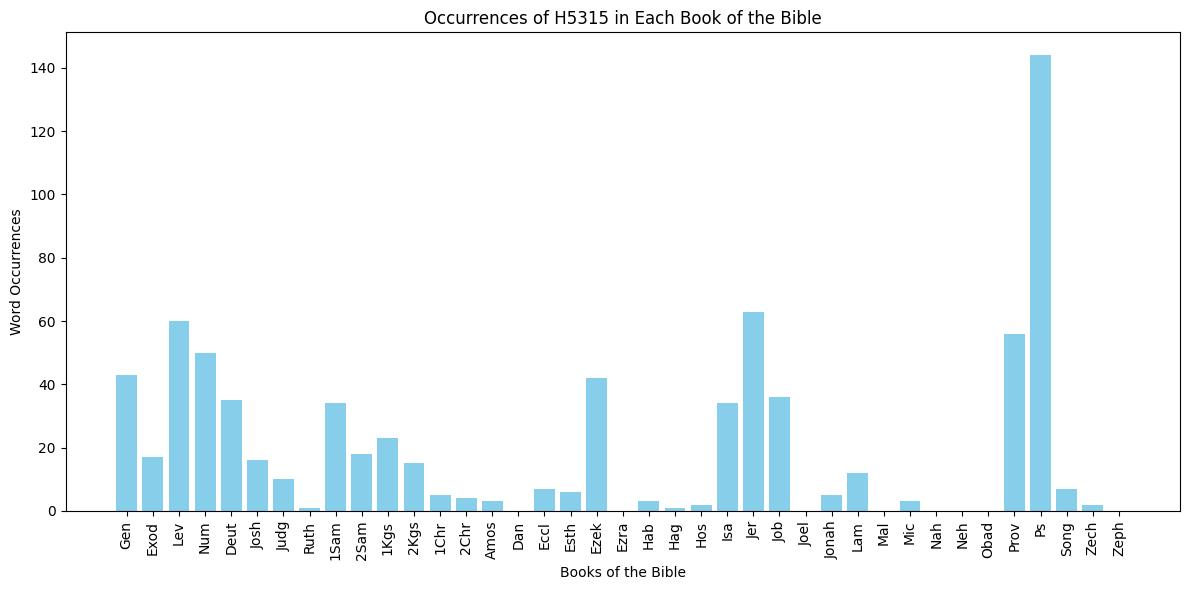

In [57]:
# Index 0 of this array, is for how many occurences a particular word has in the 0th book of the bible (genesis), also index 1, index 2, index 3, etc etc
word_occurrences_per_book = []

for i in range(0, len(book_names)):
  word_occurrences_per_book.append(0)


for i in range(0, len(data["lemma"])):
  if data["lemma"][i] == strongs_number:
    book = data["book"][i]
    idx = book_names.index(book)
    word_occurrences_per_book[idx] += 1

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(book_names, word_occurrences_per_book, color='skyblue')
plt.title("Occurrences of " + strongs_number + " in Each Book of the Bible")
plt.xlabel('Books of the Bible')
plt.ylabel('Word Occurrences')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

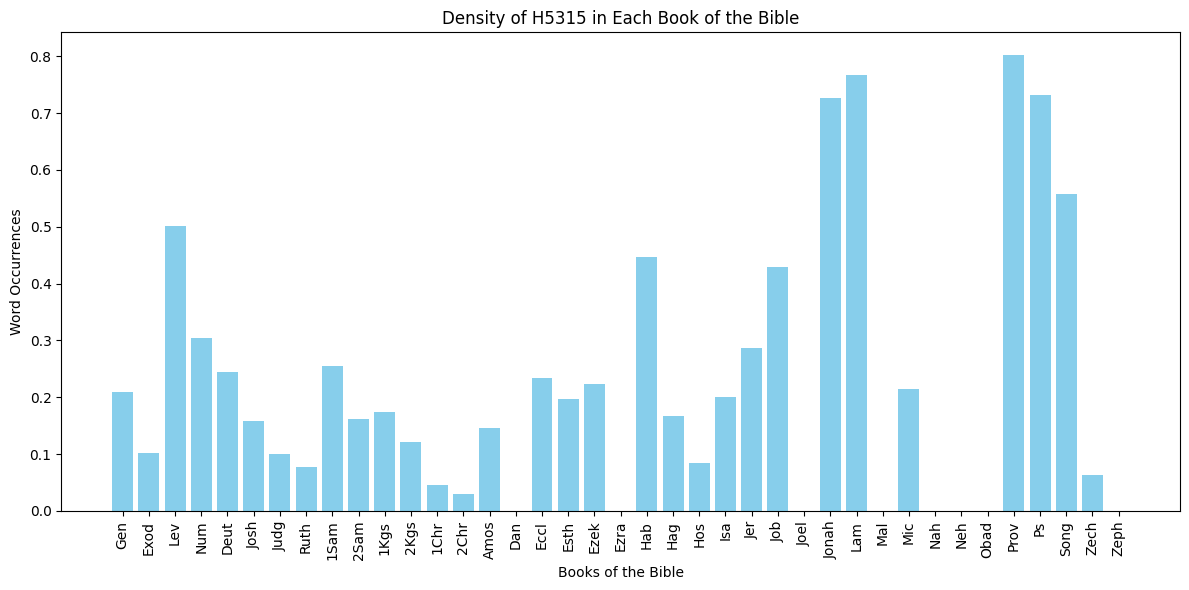

In [58]:
import matplotlib.pyplot as plt

# Print the occurances per book, accounting for the number of verses in each book
words_per_book = []
# The occurances of the strongs number divided by verses in book * 100 - essentially
# how much of the book is the strongs number
word_density = []

# Find the words per book
for i in range(0, len(book_names)):
  words_per_book.append(0)

for i in range(0, len(data["lemma"])):
    book = data["book"][i]
    idx = book_names.index(book)
    words_per_book[idx] += 1

# Find the word density
for index, number in enumerate(words_per_book) :
  if word_occurrences_per_book[index] == 0:
    word_density.append(0)
  else:
    density = (word_occurrences_per_book[index] / number) * 100
    word_density.append(density)

plt.figure(figsize=(12, 6))
plt.bar(book_names, word_density, color='skyblue')
plt.title("Density of " + strongs_number + " in Each Book of the Bible")
plt.xlabel('Books of the Bible')
plt.ylabel('Word Occurrences')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()